In [3]:
import glob
from os import path

import matplotlib.pyplot as plt
from astropy.io import fits
from scipy import ndimage
import numpy as np

from ppxf.ppxf import ppxf
import ppxf.ppxf_util as util
import time

#from sys import exit
from scipy.interpolate import CubicSpline
import shutil

import ppxf.miles_util as lib

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [4]:
#Read in weight fits file
weight_file = "/Users/Sophieslaptop/Desktop/NGC_5806/Binned cube files/Binned_SNR50/Run 9/Run9_Weights_cube_SNR50_080723.fits"
weight_hdu = fits.open(weight_file)
weight_cube = weight_hdu[1].data
print(weight_cube.shape)
#This is from run 7, so it's not the right run to actually get data from
#Just learning how to get stellar pop
#Will need a run 9 to get real results

(150, 446, 442)


In [5]:
n_weights,ny,nx = weight_cube.shape

In [6]:
#Read in coordinates of bins, and flat x and y
folder = '/Users/Sophieslaptop/Desktop/NGC_5806/Binned cube files/Binned_SNR50/'

flatx,flaty = np.loadtxt(folder + 'flatxy_arrays_SNR50.txt')
flatx = flatx.astype(int)
flaty = flaty.astype(int)

binnum_path = folder + 'bin_number_SNR50.txt'
coords_path = folder + 'xy_coords_SNR50.txt'

bin_numbers = np.loadtxt(binnum_path)
bin_numbers = bin_numbers.astype(int)

num_bins = np.max(bin_numbers)
num_bins = int(num_bins) +1
print("Number of bins: ",num_bins)

x_bar,y_bar = np.loadtxt(coords_path)
x_bar = x_bar.astype(int)
y_bar = y_bar.astype(int)

Number of bins:  6682


In [7]:
lg_age_cube = np.empty(shape=(1,ny,nx))
metal_cube = np.empty(shape=(1,ny,nx))

In [8]:
FWHM_gal = 2.52
velscale =  56.789801152442244 #Printed from multispec code
ppxf_dir = path.dirname(path.realpath(lib.__file__))
pathname = ppxf_dir + '/miles_models/Eun1.30*.fits'

#Norm range gives range in which to normalize templates
#Cappellari uses [5070, 5950], to normalize in V band
#I'm going to try my full range and see how it does
miles = lib.miles(pathname, velscale, FWHM_gal, norm_range=[4800, 8800])

In [9]:
#reg_dim = (150,) #printed from multispec code
reg_dim = (25,6) #This is from the ppxf_example_integral_cube code
#Doesn't make sense but let's see if it runs
#It works!
#And I think it's justifiable because the example code uses the same templates

In [10]:
i = 0
while(i<len(flatx)):
    x = flatx[i]
    y = flaty[i]
    
    weights = weight_cube[:,y,x]
    
    light_weights = weights.reshape(reg_dim)
    #print(light_weights.shape)
    
    lg_age_cube[:,y,x],metal_cube[:,y,x] = miles.mean_age_metal(light_weights)

    i+=1
#plt.subplot(122)
#display_bins(s.x, s.y, bin_num, lg_age_bin, colorbar=1, cmap='inferno', label='lg Age (yr)')

Weighted <lg_age> [yr]: 8.89
Weighted <[M/H]>: -0.0196
Weighted <lg_age> [yr]: 8.89
Weighted <[M/H]>: -0.0196
Weighted <lg_age> [yr]: 8.89
Weighted <[M/H]>: -0.0196
Weighted <lg_age> [yr]: 8.89
Weighted <[M/H]>: -0.0196
Weighted <lg_age> [yr]: 8.89
Weighted <[M/H]>: -0.0196
Weighted <lg_age> [yr]: 8.89
Weighted <[M/H]>: -0.0196
Weighted <lg_age> [yr]: 8.89
Weighted <[M/H]>: -0.0196
Weighted <lg_age> [yr]: 8.89
Weighted <[M/H]>: -0.0196
Weighted <lg_age> [yr]: 8.89
Weighted <[M/H]>: -0.0196
Weighted <lg_age> [yr]: 8.89
Weighted <[M/H]>: -0.0196
Weighted <lg_age> [yr]: 8.89
Weighted <[M/H]>: -0.0196
Weighted <lg_age> [yr]: 8.89
Weighted <[M/H]>: -0.0196
Weighted <lg_age> [yr]: 8.89
Weighted <[M/H]>: -0.0196
Weighted <lg_age> [yr]: 8.89
Weighted <[M/H]>: -0.0196
Weighted <lg_age> [yr]: 8.89
Weighted <[M/H]>: -0.0196
Weighted <lg_age> [yr]: 8.89
Weighted <[M/H]>: -0.0196
Weighted <lg_age> [yr]: 8.89
Weighted <[M/H]>: -0.0196
Weighted <lg_age> [yr]: 8.89
Weighted <[M/H]>: -0.0196
Weighted <

Weighted <lg_age> [yr]: 8.95
Weighted <[M/H]>: -0.177
Weighted <lg_age> [yr]: 8.95
Weighted <[M/H]>: -0.177
Weighted <lg_age> [yr]: 9.62
Weighted <[M/H]>: -0.868
Weighted <lg_age> [yr]: 9.62
Weighted <[M/H]>: -0.868
Weighted <lg_age> [yr]: 9.62
Weighted <[M/H]>: -0.868
Weighted <lg_age> [yr]: 9.34
Weighted <[M/H]>: -0.883
Weighted <lg_age> [yr]: 9.34
Weighted <[M/H]>: -0.883
Weighted <lg_age> [yr]: 9.34
Weighted <[M/H]>: -0.883
Weighted <lg_age> [yr]: 9.34
Weighted <[M/H]>: -0.883
Weighted <lg_age> [yr]: 9.46
Weighted <[M/H]>: -0.764
Weighted <lg_age> [yr]: 9.46
Weighted <[M/H]>: -0.764
Weighted <lg_age> [yr]: 9.46
Weighted <[M/H]>: -0.764
Weighted <lg_age> [yr]: 9.46
Weighted <[M/H]>: -0.764
Weighted <lg_age> [yr]: 9.46
Weighted <[M/H]>: -0.764
Weighted <lg_age> [yr]: 9.60
Weighted <[M/H]>: -1.00
Weighted <lg_age> [yr]: 9.60
Weighted <[M/H]>: -1.00
Weighted <lg_age> [yr]: 9.70
Weighted <[M/H]>: -0.820
Weighted <lg_age> [yr]: 9.70
Weighted <[M/H]>: -0.820
Weighted <lg_age> [yr]: 9.70
W

Weighted <lg_age> [yr]: 9.51
Weighted <[M/H]>: -0.963
Weighted <lg_age> [yr]: 9.44
Weighted <[M/H]>: -0.999
Weighted <lg_age> [yr]: 9.44
Weighted <[M/H]>: -0.999
Weighted <lg_age> [yr]: 9.44
Weighted <[M/H]>: -0.999
Weighted <lg_age> [yr]: 9.44
Weighted <[M/H]>: -0.999
Weighted <lg_age> [yr]: 9.44
Weighted <[M/H]>: -0.999
Weighted <lg_age> [yr]: 9.18
Weighted <[M/H]>: -0.0539
Weighted <lg_age> [yr]: 9.18
Weighted <[M/H]>: -0.0539
Weighted <lg_age> [yr]: 9.18
Weighted <[M/H]>: -0.0539
Weighted <lg_age> [yr]: 9.44
Weighted <[M/H]>: -0.613
Weighted <lg_age> [yr]: 9.44
Weighted <[M/H]>: -0.613
Weighted <lg_age> [yr]: 9.44
Weighted <[M/H]>: -0.613
Weighted <lg_age> [yr]: 9.44
Weighted <[M/H]>: -0.613
Weighted <lg_age> [yr]: 9.26
Weighted <[M/H]>: -0.788
Weighted <lg_age> [yr]: 9.26
Weighted <[M/H]>: -0.788
Weighted <lg_age> [yr]: 9.26
Weighted <[M/H]>: -0.788
Weighted <lg_age> [yr]: 9.26
Weighted <[M/H]>: -0.788
Weighted <lg_age> [yr]: 8.89
Weighted <[M/H]>: -0.293
Weighted <lg_age> [yr]: 8

Weighted <lg_age> [yr]: 9.37
Weighted <[M/H]>: -0.712
Weighted <lg_age> [yr]: 9.37
Weighted <[M/H]>: -0.712
Weighted <lg_age> [yr]: 9.04
Weighted <[M/H]>: -0.464
Weighted <lg_age> [yr]: 9.04
Weighted <[M/H]>: -0.464
Weighted <lg_age> [yr]: 9.04
Weighted <[M/H]>: -0.464
Weighted <lg_age> [yr]: 9.04
Weighted <[M/H]>: -0.464
Weighted <lg_age> [yr]: 9.21
Weighted <[M/H]>: -0.534
Weighted <lg_age> [yr]: 9.21
Weighted <[M/H]>: -0.534
Weighted <lg_age> [yr]: 9.56
Weighted <[M/H]>: -0.808
Weighted <lg_age> [yr]: 9.56
Weighted <[M/H]>: -0.808
Weighted <lg_age> [yr]: 9.56
Weighted <[M/H]>: -0.808
Weighted <lg_age> [yr]: 9.56
Weighted <[M/H]>: -0.808
Weighted <lg_age> [yr]: 9.23
Weighted <[M/H]>: -0.667
Weighted <lg_age> [yr]: 9.23
Weighted <[M/H]>: -0.667
Weighted <lg_age> [yr]: 9.23
Weighted <[M/H]>: -0.667
Weighted <lg_age> [yr]: 9.26
Weighted <[M/H]>: -0.563
Weighted <lg_age> [yr]: 9.26
Weighted <[M/H]>: -0.563
Weighted <lg_age> [yr]: 9.26
Weighted <[M/H]>: -0.563
Weighted <lg_age> [yr]: 9.25

Weighted <lg_age> [yr]: 9.05
Weighted <[M/H]>: -0.559
Weighted <lg_age> [yr]: 9.05
Weighted <[M/H]>: -0.559
Weighted <lg_age> [yr]: 9.28
Weighted <[M/H]>: -0.639
Weighted <lg_age> [yr]: 9.28
Weighted <[M/H]>: -0.639
Weighted <lg_age> [yr]: 9.28
Weighted <[M/H]>: -0.639
Weighted <lg_age> [yr]: 9.21
Weighted <[M/H]>: -0.420
Weighted <lg_age> [yr]: 9.21
Weighted <[M/H]>: -0.420
Weighted <lg_age> [yr]: 9.21
Weighted <[M/H]>: -0.638
Weighted <lg_age> [yr]: 9.21
Weighted <[M/H]>: -0.638
Weighted <lg_age> [yr]: 9.21
Weighted <[M/H]>: -0.638
Weighted <lg_age> [yr]: 9.15
Weighted <[M/H]>: -0.227
Weighted <lg_age> [yr]: 9.15
Weighted <[M/H]>: -0.227
Weighted <lg_age> [yr]: 9.15
Weighted <[M/H]>: -0.227
Weighted <lg_age> [yr]: 9.61
Weighted <[M/H]>: -1.10
Weighted <lg_age> [yr]: 9.61
Weighted <[M/H]>: -1.10
Weighted <lg_age> [yr]: 9.61
Weighted <[M/H]>: -1.10
Weighted <lg_age> [yr]: 9.22
Weighted <[M/H]>: -0.387
Weighted <lg_age> [yr]: 9.22
Weighted <[M/H]>: -0.387
Weighted <lg_age> [yr]: 9.22
We

Weighted <lg_age> [yr]: 8.92
Weighted <[M/H]>: -0.158
Weighted <lg_age> [yr]: 8.92
Weighted <[M/H]>: -0.158
Weighted <lg_age> [yr]: 9.24
Weighted <[M/H]>: 0.136
Weighted <lg_age> [yr]: 9.24
Weighted <[M/H]>: 0.136
Weighted <lg_age> [yr]: 9.10
Weighted <[M/H]>: -0.353
Weighted <lg_age> [yr]: 9.10
Weighted <[M/H]>: -0.353
Weighted <lg_age> [yr]: 9.10
Weighted <[M/H]>: -0.353
Weighted <lg_age> [yr]: 9.14
Weighted <[M/H]>: -0.481
Weighted <lg_age> [yr]: 9.14
Weighted <[M/H]>: -0.481
Weighted <lg_age> [yr]: 9.14
Weighted <[M/H]>: -0.481
Weighted <lg_age> [yr]: 8.70
Weighted <[M/H]>: 0.0191
Weighted <lg_age> [yr]: 8.70
Weighted <[M/H]>: 0.0191
Weighted <lg_age> [yr]: 8.84
Weighted <[M/H]>: -0.0214
Weighted <lg_age> [yr]: 8.84
Weighted <[M/H]>: -0.0214
Weighted <lg_age> [yr]: 8.92
Weighted <[M/H]>: -0.602
Weighted <lg_age> [yr]: 8.92
Weighted <[M/H]>: -0.602
Weighted <lg_age> [yr]: 8.92
Weighted <[M/H]>: -0.602
Weighted <lg_age> [yr]: 9.14
Weighted <[M/H]>: -0.372
Weighted <lg_age> [yr]: 9.14

Weighted <lg_age> [yr]: 9.26
Weighted <[M/H]>: -0.861
Weighted <lg_age> [yr]: 9.26
Weighted <[M/H]>: -0.861
Weighted <lg_age> [yr]: 9.38
Weighted <[M/H]>: -0.494
Weighted <lg_age> [yr]: 9.38
Weighted <[M/H]>: -0.494
Weighted <lg_age> [yr]: 9.38
Weighted <[M/H]>: -0.494
Weighted <lg_age> [yr]: 9.38
Weighted <[M/H]>: -0.494
Weighted <lg_age> [yr]: 9.38
Weighted <[M/H]>: -0.494
Weighted <lg_age> [yr]: 9.38
Weighted <[M/H]>: -0.494
Weighted <lg_age> [yr]: 9.36
Weighted <[M/H]>: -1.36
Weighted <lg_age> [yr]: 9.36
Weighted <[M/H]>: -1.36
Weighted <lg_age> [yr]: 9.27
Weighted <[M/H]>: -1.20
Weighted <lg_age> [yr]: 9.27
Weighted <[M/H]>: -1.20
Weighted <lg_age> [yr]: 9.27
Weighted <[M/H]>: -1.20
Weighted <lg_age> [yr]: 9.61
Weighted <[M/H]>: -0.387
Weighted <lg_age> [yr]: 9.61
Weighted <[M/H]>: -0.387
Weighted <lg_age> [yr]: 9.61
Weighted <[M/H]>: -0.387
Weighted <lg_age> [yr]: 9.61
Weighted <[M/H]>: -0.387
Weighted <lg_age> [yr]: 9.61
Weighted <[M/H]>: -0.387
Weighted <lg_age> [yr]: 9.61
Weig

Weighted <lg_age> [yr]: 9.08
Weighted <[M/H]>: -0.508
Weighted <lg_age> [yr]: 8.91
Weighted <[M/H]>: 0.0454
Weighted <lg_age> [yr]: 8.91
Weighted <[M/H]>: 0.0454
Weighted <lg_age> [yr]: 8.91
Weighted <[M/H]>: 0.0454
Weighted <lg_age> [yr]: 9.06
Weighted <[M/H]>: -0.497
Weighted <lg_age> [yr]: 9.35
Weighted <[M/H]>: -0.702
Weighted <lg_age> [yr]: 9.35
Weighted <[M/H]>: -0.702
Weighted <lg_age> [yr]: 9.35
Weighted <[M/H]>: -0.702
Weighted <lg_age> [yr]: 9.35
Weighted <[M/H]>: -0.702
Weighted <lg_age> [yr]: 9.30
Weighted <[M/H]>: -0.984
Weighted <lg_age> [yr]: 9.30
Weighted <[M/H]>: -0.984
Weighted <lg_age> [yr]: 9.27
Weighted <[M/H]>: -0.850
Weighted <lg_age> [yr]: 9.27
Weighted <[M/H]>: -0.850
Weighted <lg_age> [yr]: 9.26
Weighted <[M/H]>: -0.554
Weighted <lg_age> [yr]: 9.26
Weighted <[M/H]>: -0.554
Weighted <lg_age> [yr]: 8.90
Weighted <[M/H]>: -0.714
Weighted <lg_age> [yr]: 8.90
Weighted <[M/H]>: -0.714
Weighted <lg_age> [yr]: 8.90
Weighted <[M/H]>: -0.714
Weighted <lg_age> [yr]: 8.91

/Applications/anaconda3/lib/python3.9/site-packages/ppxf/miles_util.py:403: RuntimeWarning: invalid value encountered in double_scalars
  mean_lg_age = np.sum(weights*lg_age_grid)/np.sum(weights)
/Applications/anaconda3/lib/python3.9/site-packages/ppxf/miles_util.py:404: RuntimeWarning: invalid value encountered in double_scalars
  mean_metal = np.sum(weights*metal_grid)/np.sum(weights)
IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [11]:
#Can metallicity be negative? I don't think it should be. 
#But it's negative in the example code too, so I guess we're good. 

In [12]:
#For plotting, define x and y
#Define x and y axes for all the images

xcen = nx/2  #Could later input more exact location of AGN
ycen = ny/2   #But for now, estimating center of image

vectorx = (np.arange(nx)-xcen)* 22 #Convert from pixes to pc      
vectory = (np.arange(ny)-ycen)* 22

X,Y = np.meshgrid(vectorx, vectory)
print(X.shape,Y.shape)

(446, 442) (446, 442)


Text(0, 0.5, 'Offset (pc)')

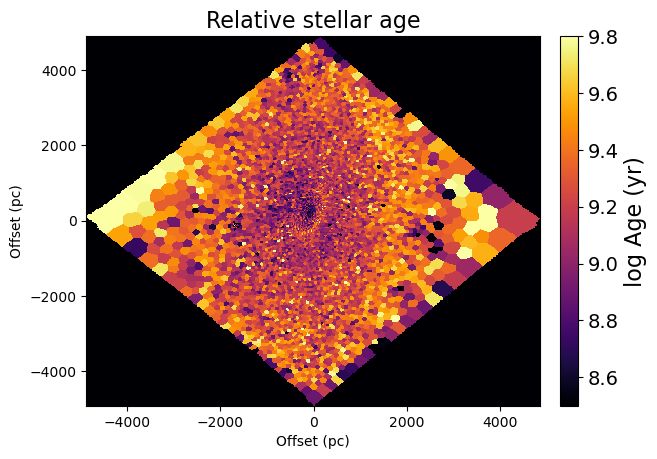

In [13]:
Z_age = np.squeeze(lg_age_cube, axis=0)

fig = plt.figure()
im = plt.pcolormesh(X,Y,Z_age, cmap='inferno',rasterized=True, shading='auto',vmin=8.5,vmax=9.8)
#plt.axis([-5,5,-5,5]) #Limit x and y axes


plt.title('Relative stellar age',fontsize=16)
cbar = fig.colorbar(im, fraction=0.046, pad=0.04)
cbar.set_label('log Age (yr)', fontsize=16)
cbar.ax.tick_params(labelsize=14)
plt.xlabel("Offset (pc)")
plt.ylabel("Offset (pc)")

Text(0, 0.5, 'Offset (pc)')

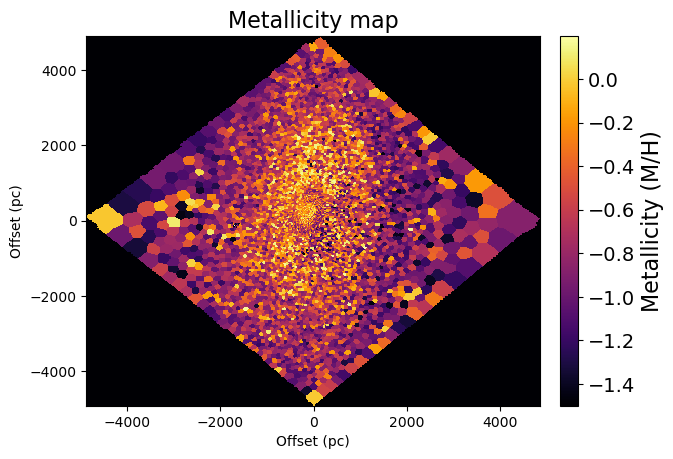

In [14]:
Z_metal = np.squeeze(metal_cube, axis=0)
for i in range(nx):
    for j in range(ny):
        if Z_age[j,i] < .01:
            Z_metal[j,i] = -10

fig = plt.figure()
im = plt.pcolormesh(X,Y,Z_metal, cmap='inferno',rasterized=True, shading='auto',vmin=-1.50)
#plt.axis([-5,5,-5,5]) #Limit x and y axes


plt.title('Metallicity map',fontsize=16)
cbar = fig.colorbar(im, fraction=0.046, pad=0.04)
cbar.set_label('Metallicity (M/H)', fontsize=16)
cbar.ax.tick_params(labelsize=14)
plt.xlabel("Offset (pc)")
plt.ylabel("Offset (pc)")

In [15]:
#To check fit, looking at other plots

In [24]:
#Read in weight fits file
results_file = "/Users/Sophieslaptop/Desktop/NGC_5806/Binned cube files/Binned_SNR50/Run 9/Run9_Results_cube_SNR50_080723.fits"
results_hdu = fits.open(results_file)
results_cube = results_hdu[0].data
print(results_cube.shape)

(7, 446, 442)


Text(0, 0.5, 'Offset (pc)')

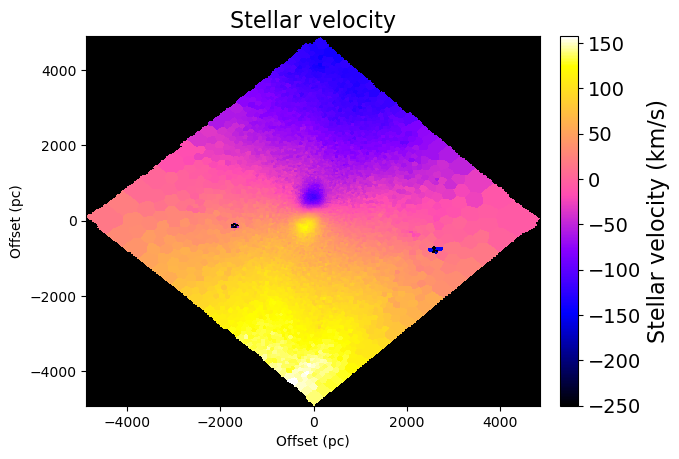

In [25]:
#Plot 2D image of results from ppxf fit

image_2D = np.squeeze(results_cube[0,:,:]) #Stellar velocity

for i in range(nx):
    for j in range(ny):
        image_2D[j,i] = image_2D[j,i] - 1350

Z = image_2D
fig = plt.figure()
im = plt.pcolormesh(X,Y,Z, cmap='gnuplot2',rasterized=True, shading='auto',vmin=-250)
#plt.axis([-5,5,-5,5]) #Limit x and y axes

#plt.xlabel('Offset [Arcseconds]')
#plt.ylabel('Offset [Arcseconds]')
plt.title('Stellar velocity',fontsize=16)
cbar = fig.colorbar(im, fraction=0.046, pad=0.04)
cbar.set_label('Stellar velocity (km/s)', fontsize=16)
cbar.ax.tick_params(labelsize=14)
plt.xlabel("Offset (pc)")
plt.ylabel("Offset (pc)")

Text(0, 0.5, 'Offset (pc)')

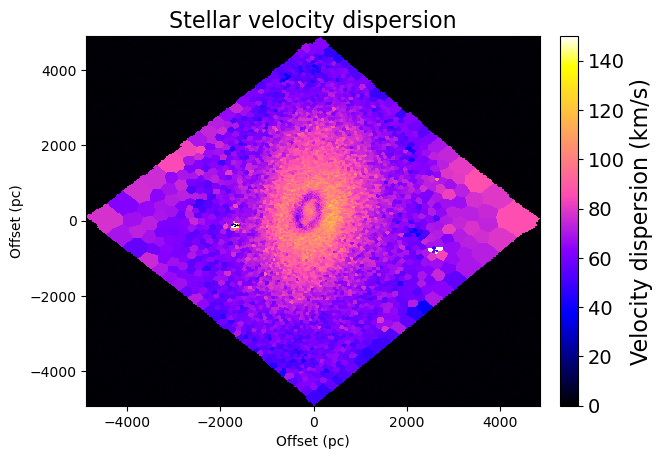

In [29]:
image_2D = np.squeeze(results_cube[1,:,:]) #Stellar disp

Z = image_2D
fig = plt.figure()
im = plt.pcolormesh(X,Y,Z, cmap='gnuplot2',rasterized=True, shading='auto',vmax=150)
#plt.axis([-5,5,-5,5]) #Limit x and y axes

#plt.xlabel('Offset [Arcseconds]')
#plt.ylabel('Offset [Arcseconds]')
plt.title('Stellar velocity dispersion',fontsize=16)
cbar = fig.colorbar(im, fraction=0.046, pad=0.04)
cbar.set_label('Velocity dispersion (km/s)', fontsize=16)
cbar.ax.tick_params(labelsize=14)
plt.xlabel("Offset (pc)")
plt.ylabel("Offset (pc)")

Text(0, 0.5, 'Offset (pc)')

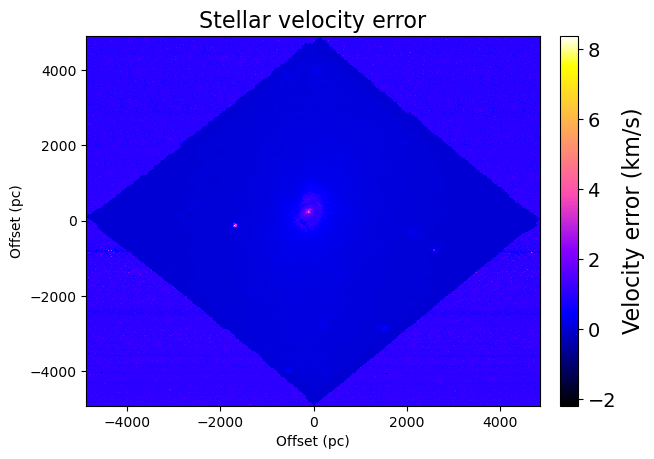

In [35]:
image_2D = np.squeeze(results_cube[5,:,:]) #Stellar vel err

Z = image_2D
fig = plt.figure()
im = plt.pcolormesh(X,Y,Z, cmap='gnuplot2',rasterized=True, shading='auto')
#plt.axis([-5,5,-5,5]) #Limit x and y axes

#plt.xlabel('Offset [Arcseconds]')
#plt.ylabel('Offset [Arcseconds]')
plt.title('Stellar velocity error',fontsize=16)
cbar = fig.colorbar(im, fraction=0.046, pad=0.04)
cbar.set_label('Velocity error (km/s)', fontsize=16)
cbar.ax.tick_params(labelsize=14)
plt.xlabel("Offset (pc)")
plt.ylabel("Offset (pc)")